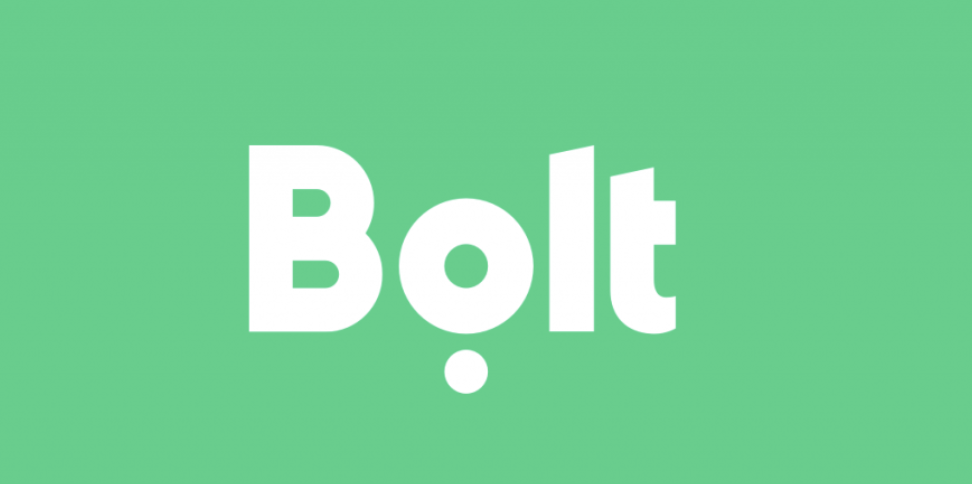

#About Dataset


---
**<font size="6">Problem Statement**:

<font size="6">Optimizing Cab Supply to Meet Demand</font>

---
<font size="4">**Background**:

Ensuring a balance between supply (available cabs) and demand (customer requests) is critical for our cab service business. While we cannot control customer demand, we can potentially adjust the distribution of our driver supply to better cover peak demand hours.


**<font size="4">Current Challenge**:

We suspect a mismatch between supply and demand, potentially leading to:

*   Lost revenue: Customers unable to find cabs during peak demand periods.

*   Driver dissatisfaction: Drivers may experience periods of low ridership during off-peak hours.

---


**<font size="4">Objectives**:



1.   Analyze Demand-Supply Dynamics:

  *   Quantify the supply-demand relationship across a week.

  *   Identify hours with the highest under-supply (demand exceeding supply).


2.   Visualize Supply-Demand Trends:

  *   Create a 24-hour curve depicting average weekly supply and demand.

  *   Develop a visual representation of under-supply hours throughout the week.


3.   Optimize Driver Coverage:

  *   Estimate the number of additional driver hours needed to achieve a high "Coverage Ratio" during peak demand periods.



4.   Maximize Revenue:

  *  Calculate the guaranteed hourly earnings required to incentivize drivers to work during high-demand (36 hours/week) without incurring losses for the company. This should account for the average ride value (€10) where 80% goes to the driver.

  *  Estimate the number of additional hours needed to capture missed demand ("people saw 0 cars" in demand data).

---

**<font size="4">Assumptions**:

1.  Average ride value = €10 (80% to driver, 20% to company).

2.  Customer demand remains constant with increased supply.

3.  Increased supply translates to capturing "missed coverage" or unmet demand.

---

**<font size="4">Outputs**:

1.  Visualization of the 36 weekly hours with the highest under-supply.

2.  24-hour curve depicting average weekly supply and demand.

3.  Visualization of under-supply hours throughout the week.

4.  Estimated number of additional driver hours needed for peak demand coverage.

5.  Guaranteed hourly earnings for high-demand hours ensuring driver incentives and company profitability.

6.  Estimation of additional hours needed to capture missed demand.

---

#Loading Dataset

In [1]:
!gdown 150SPkA8C7f-jsl5VkGLpgm6bsMzas5FM
!gdown 1N6_LPvFsl_vgFV2O5_TkRkmdgjFazH8P

Downloading...
From: https://drive.google.com/uc?id=150SPkA8C7f-jsl5VkGLpgm6bsMzas5FM
To: /content/Demand and supply analysis - Coverage Ratio.csv
100% 8.52k/8.52k [00:00<00:00, 21.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N6_LPvFsl_vgFV2O5_TkRkmdgjFazH8P
To: /content/Demand and supply analysis - Driver Activity.csv
100% 8.51k/8.51k [00:00<00:00, 17.0MB/s]


In [ ]:
import pandas as pd

In [ ]:
df_driver = pd.read_csv('Demand and supply analysis - Driver Activity.csv')
df_coverage = pd.read_csv('Demand and supply analysis - Coverage Ratio.csv')

In [ ]:
df_driver.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides
0,2020-03-15 23,67,33,21,12,14,"0,5","1,55",51.0
1,2020-03-15 22,90,36,16,20,15,"0,4","1,19",43.0
2,2020-03-15 21,95,35,17,18,15,"0,4","1,29",45.0


In [ ]:
df_coverage.head(3)

,Date,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday
0,2020-03-15 23,34,89,72,3/15/2020,23,Sunday
1,2020-03-15 22,2,91,98,3/15/2020,22,Sunday
2,2020-03-15 21,16,97,86,3/15/2020,21,Sunday


In [ ]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      192 non-null    object 
 1   Active drivers            192 non-null    int64  
 2   Available online (hours)  192 non-null    int64  
 3   Booked (hours)            192 non-null    int64  
 4   Idle time (hours)         192 non-null    int64  
 5   Not available (hours)     192 non-null    int64  
 6   Hours per active driver   192 non-null    object 
 7   Rides per hour online     192 non-null    object 
 8   Completed rides           180 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 13.6+ KB


In [ ]:
df_coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date                               192 non-null    object
 1   Unique users (no cabs available)   192 non-null    int64 
 2   Unique users (1+ cabs available)   192 non-null    int64 
 3   Coverage ratio                     192 non-null    int64 
 4   Date.1                             192 non-null    object
 5   Time                               192 non-null    int64 
 6   Weekday                            192 non-null    object
dtypes: int64(4), object(3)
memory usage: 10.6+ KB


# Data Cleaning

In [ ]:
df_driver['Hours per active driver'] = df_driver['Hours per active driver'].apply(lambda x : x.replace(',','.')).astype(float)
df_driver['Rides per hour online'] = df_driver['Rides per hour online'].apply(lambda x : x.replace(',','.')).astype(float)
df_driver.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0


In [ ]:
df = df_driver.merge(df_coverage, on = 'Date')
df.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,3/15/2020,23,Sunday
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,3/15/2020,22,Sunday
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0,16,97,86,3/15/2020,21,Sunday


In [ ]:
df['Date.1'] = df['Date'].apply(lambda x : x.split()[0])
df.head(2)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,2020-03-15,23,Sunday
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,2020-03-15,22,Sunday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               192 non-null    object 
 1   Active drivers                     192 non-null    int64  
 2   Available online (hours)           192 non-null    int64  
 3   Booked (hours)                     192 non-null    int64  
 4   Idle time (hours)                  192 non-null    int64  
 5   Not available (hours)              192 non-null    int64  
 6   Hours per active driver            192 non-null    float64
 7   Rides per hour online              192 non-null    float64
 8   Completed rides                    180 non-null    float64
 9   Unique users (no cabs available)   192 non-null    int64  
 10  Unique users (1+ cabs available)   192 non-null    int64  
 11  Coverage ratio                     192 non-null    int64  

In [ ]:
df['Date.1'] = pd.to_datetime(df['Date.1'])
df.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,2020-03-15,23,Sunday
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,2020-03-15,22,Sunday
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0,16,97,86,2020-03-15,21,Sunday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               192 non-null    object        
 1   Active drivers                     192 non-null    int64         
 2   Available online (hours)           192 non-null    int64         
 3   Booked (hours)                     192 non-null    int64         
 4   Idle time (hours)                  192 non-null    int64         
 5   Not available (hours)              192 non-null    int64         
 6   Hours per active driver            192 non-null    float64       
 7   Rides per hour online              192 non-null    float64       
 8   Completed rides                    180 non-null    float64       
 9   Unique users (no cabs available)   192 non-null    int64         
 10  Unique users (1+ cabs available)   192

# Handling Missing Values

In [ ]:
df.isna().sum()

Date                                  0
Active drivers                        0
Available online (hours)              0
Booked (hours)                        0
Idle time (hours)                     0
Not available (hours)                 0
Hours per active driver               0
Rides per hour online                 0
Completed rides                      12
Unique users (no cabs available)      0
Unique users (1+ cabs available)      0
Coverage ratio                        0
Date.1                                0
Time                                  0
Weekday                               0
dtype: int64

In [ ]:
df[df['Completed rides'].isna()]

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday
19,2020-03-15 04,21,6,1,5,4,0.3,0.0,NaN,5,3,38,2020-03-15,4,Sunday
42,2020-03-14 05,17,6,0,6,6,0.4,0.0,NaN,2,3,60,2020-03-14,5,Saturday
43,2020-03-14 04,14,5,1,4,6,0.4,0.0,NaN,3,3,50,2020-03-14,4,Saturday
66,2020-03-13 05,13,4,0,4,5,0.3,0.0,NaN,1,3,75,2020-03-13,5,Friday
67,2020-03-13 04,16,5,0,5,5,0.3,0.0,NaN,0,1,100,2020-03-13,4,Friday
68,2020-03-13 03,14,5,0,4,6,0.4,0.0,NaN,1,2,67,2020-03-13,3,Friday
90,2020-03-12 05,14,2,0,2,5,0.1,0.0,NaN,2,0,0,2020-03-12,5,Thursday
91,2020-03-12 04,9,2,0,2,4,0.2,0.0,NaN,6,0,0,2020-03-12,4,Thursday
92,2020-03-12 03,12,3,0,3,3,0.3,0.0,NaN,5,2,29,2020-03-12,3,Thursday
112,2020-03-11 07,25,11,1,10,8,0.4,0.0,NaN,3,5,63,2020-03-11,7,Wednesday


In [ ]:
import warnings

def filling_nan(split_df):
  split_df['Completed rides'] = split_df['Completed rides'].fillna(round(split_df['Completed rides'].mean(),2))
  return split_df

warnings.filterwarnings("ignore", category=FutureWarning)

Completed_rides_group=df.groupby(['Weekday'])[['Completed rides']].apply(filling_nan)

warnings.resetwarnings()

Completed_rides_group

,Completed rides
0,51.00
1,43.00
2,45.00
3,50.00
4,44.00
...,...
187,21.36
188,1.00
189,2.00
190,4.00


In [ ]:
Completed_rides_group.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Completed rides    0
dtype: int64

In [ ]:
df['Completed rides'] = Completed_rides_group
df['Completed rides'].isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

#Average Demand-Supply Curve

In [ ]:
df['Demand'] = round((df['Unique users (no cabs available) '] + df['Unique users (1+ cabs available)'])*(df['Booked (hours)']/df['Completed rides']),2)
df['Supply'] = df['Available online (hours)']
df.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday,Demand,Supply
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,2020-03-15,23,Sunday,50.65,33
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,2020-03-15,22,Sunday,34.60,36
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0,16,97,86,2020-03-15,21,Sunday,42.69,35


Rides per hour = Completed Rides / Available online

In [ ]:
import matplotlib.pyplot as plt

## Hourly Demand-Supply Curve

In [ ]:
hourly_df = round(df.groupby('Time').aggregate({'Demand':'median','Supply':'median'}),2)
hourly_df = hourly_df.reset_index()
hourly_df.head(3)

,Time,Demand,Supply
0,0,24.70,21.0
1,1,14.86,16.5
2,2,10.75,8.0


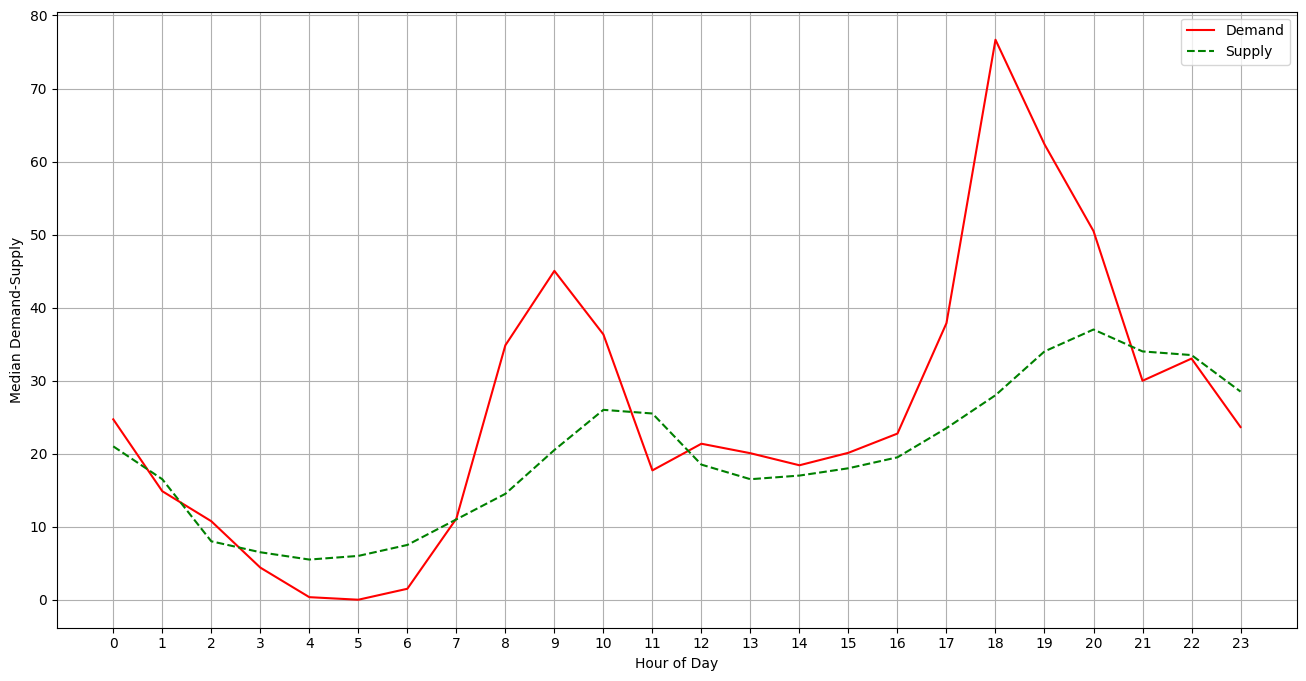

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(hourly_df['Demand'],color='red', label = 'Demand', linestyle='-')
plt.plot(hourly_df['Supply'],color='green', label = 'Supply', linestyle='--')
plt.grid(True)
plt.xlabel('Hour of Day')
plt.ylabel('Median Demand-Supply')
plt.xticks([i for i in range(24)])
plt.legend()
plt.show()

We can clearly see the "hour of day" where there in an over-supply.

##Weekly Demand-Supply Curve

In [ ]:
import seaborn as sns

In [ ]:
len(df['Demand']),len(df['Supply']), len(df['Time']), len(df['Weekday'])

(192, 192, 192, 192)

In [ ]:
weekly_df = df[['Weekday','Time','Demand','Supply']]
weekly_df = weekly_df.groupby(['Weekday','Time']).aggregate({'Demand':'median', 'Supply':'median'}).reset_index()
weekly_df

,Weekday,Time,Demand,Supply
0,Friday,0,17.50,16.0
1,Friday,1,17.00,10.0
2,Friday,2,2.00,7.0
3,Friday,3,0.00,5.0
4,Friday,4,0.00,5.0
...,...,...,...,...
163,Wednesday,19,45.60,24.0
164,Wednesday,20,27.00,22.0
165,Wednesday,21,19.53,15.0
166,Wednesday,22,27.29,21.0


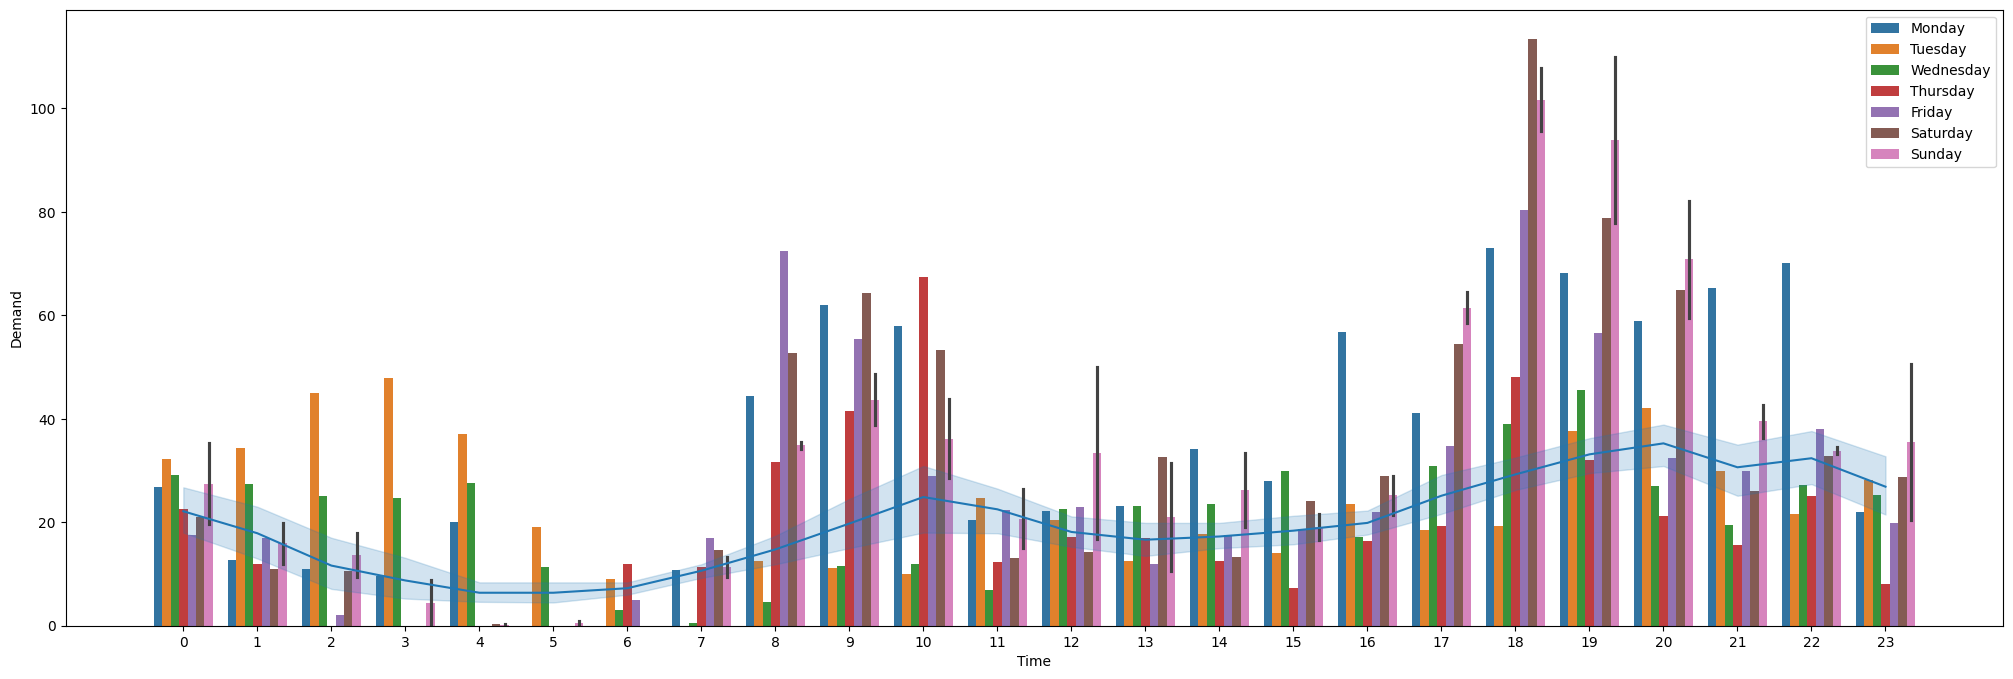

In [ ]:
plt.figure(figsize=(25,8))


warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.barplot(x='Time',y='Demand',data=weekly_df, hue ='Weekday', hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.lineplot(x='Time', y='Supply', data=weekly_df)
plt.show()

In [ ]:
weekly_df = df[['Weekday','Time','Demand','Supply','Date.1']]
weekly_df = weekly_df.fillna(0)
weekly_df['Day_of_Week'] = pd.to_datetime(weekly_df['Date.1']).dt.dayofweek
weekly_df = weekly_df.sort_values(by=['Weekday','Time'])
weekly_df['Weekday_Time'] = weekly_df['Weekday']+'_'+weekly_df['Time'].astype(str)
weekly_df

,Weekday,Time,Demand,Supply,Date.1,Day_of_Week,Weekday_Time
71,Friday,0,17.50,16,2020-03-13,4,Friday_0
70,Friday,1,17.00,10,2020-03-13,4,Friday_1
69,Friday,2,2.00,7,2020-03-13,4,Friday_2
68,Friday,3,0.00,5,2020-03-13,4,Friday_3
67,Friday,4,0.00,5,2020-03-13,4,Friday_4
...,...,...,...,...,...,...,...
100,Wednesday,19,45.60,24,2020-03-11,2,Wednesday_19
99,Wednesday,20,27.00,22,2020-03-11,2,Wednesday_20
98,Wednesday,21,19.53,15,2020-03-11,2,Wednesday_21
97,Wednesday,22,27.29,21,2020-03-11,2,Wednesday_22


In [ ]:
weekly_df['Supply_Demand_Ratio'] = round(weekly_df['Supply']/weekly_df['Demand'],2)
weekly_df = weekly_df.sort_values(by=['Day_of_Week','Time'])
weekly_df

,Weekday,Time,Demand,Supply,Date.1,Day_of_Week,Weekday_Time,Supply_Demand_Ratio
167,Monday,0,26.91,25,2020-03-09,0,Monday_0,0.93
166,Monday,1,12.73,18,2020-03-09,0,Monday_1,1.41
165,Monday,2,11.00,14,2020-03-09,0,Monday_2,1.27
164,Monday,3,9.67,11,2020-03-09,0,Monday_3,1.14
163,Monday,4,20.00,7,2020-03-09,0,Monday_4,0.35
...,...,...,...,...,...,...,...,...
170,Sunday,21,36.36,36,2020-03-08,6,Sunday_21,0.99
1,Sunday,22,34.60,36,2020-03-15,6,Sunday_22,1.04
169,Sunday,22,33.13,35,2020-03-08,6,Sunday_22,1.06
0,Sunday,23,50.65,33,2020-03-15,6,Sunday_23,0.65


In [ ]:
weekly_df['undersupply'] = weekly_df['Demand']-weekly_df['Supply']
undersupply_df = weekly_df.groupby('Weekday_Time').aggregate({'undersupply':'median','Supply_Demand_Ratio':'median'}).reset_index()
undersupply_df = undersupply_df.sort_values(by=['undersupply'], ascending =[False])
undersupply_df

,Weekday_Time,undersupply,Supply_Demand_Ratio
58,Saturday_18,86.400,0.240
82,Sunday_18,69.215,0.315
22,Friday_8,59.470,0.180
83,Sunday_19,58.925,0.390
10,Friday_18,55.400,0.310
...,...,...,...
103,Thursday_15,-13.670,2.860
105,Thursday_17,-14.750,1.770
51,Saturday_11,-14.820,2.120
135,Tuesday_22,-16.330,1.750


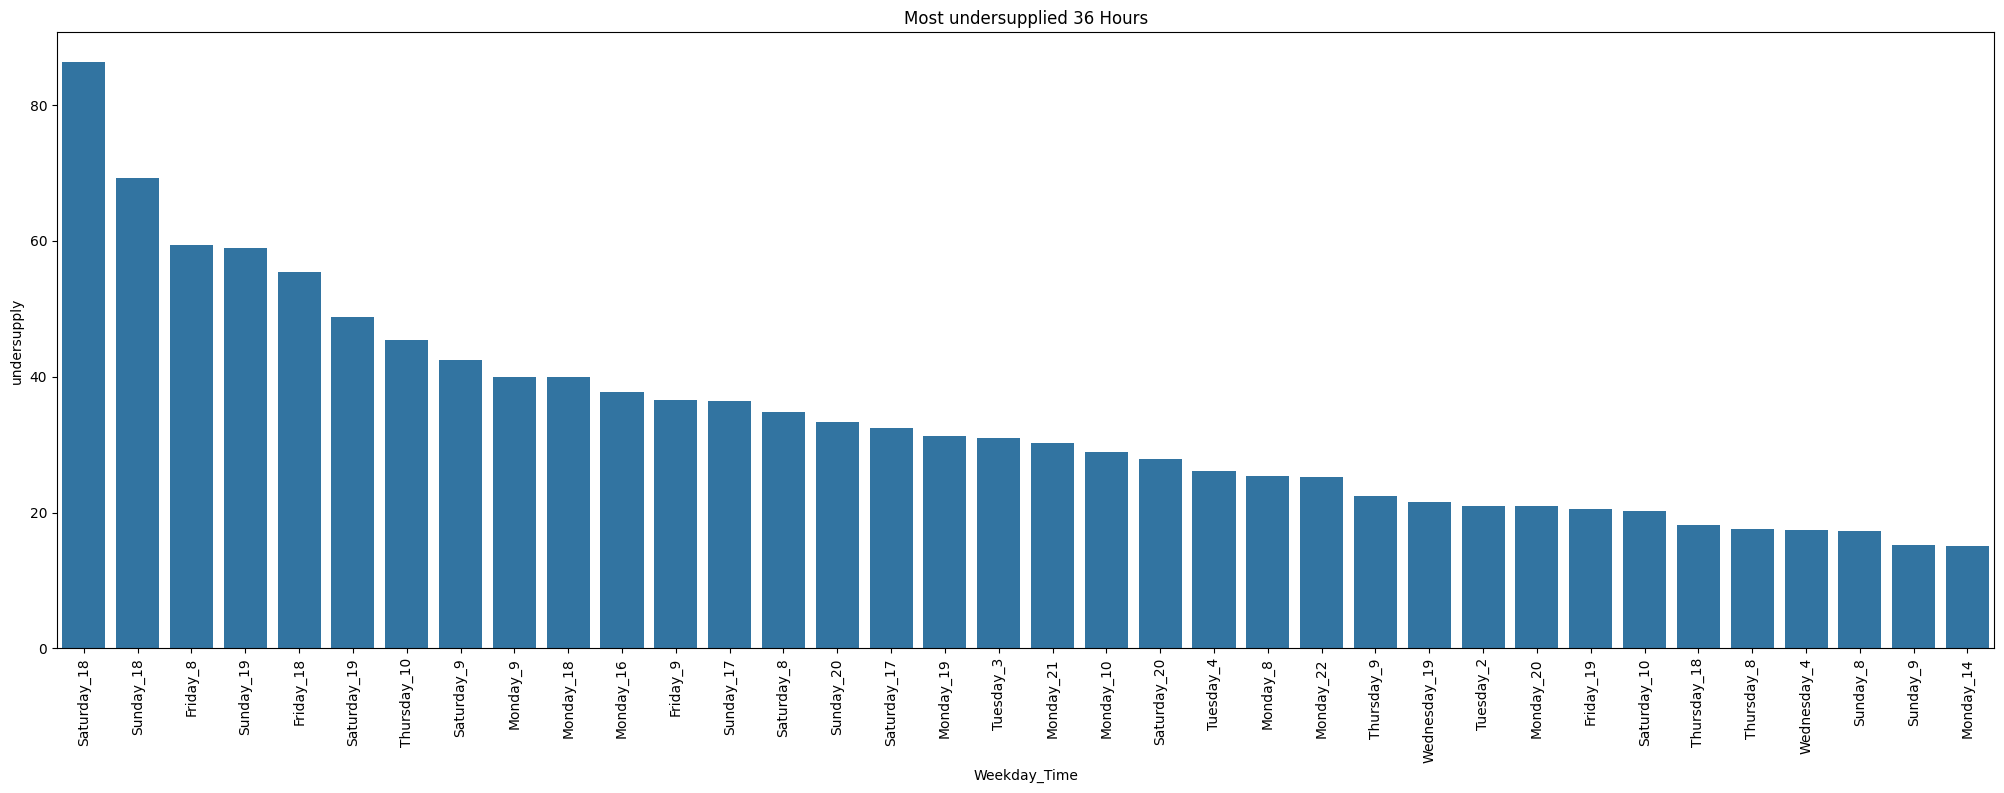

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='Weekday_Time', y='undersupply', data = undersupply_df.head(36))
plt.xticks(rotation=90)
plt.title('Most undersupplied 36 Hours')

plt.show()

This graph also estimates the number of hours needed to ensure a high coverage ratio.

In [ ]:
undersupply_df[undersupply_df['undersupply']<0]

,Weekday_Time,undersupply,Supply_Demand_Ratio
16,Friday_23,-0.11,1.01
49,Saturday_1,-0.12,1.01
45,Monday_7,-0.14,1.01
73,Sunday_1,-0.54,1.11
120,Tuesday_0,-0.80,1.02
...,...,...,...
103,Thursday_15,-13.67,2.86
105,Thursday_17,-14.75,1.77
51,Saturday_11,-14.82,2.12
135,Tuesday_22,-16.33,1.75


In [ ]:
pivot_table = weekly_df.pivot_table(values='undersupply', index='Time', columns='Weekday')
pivot_table = pivot_table[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

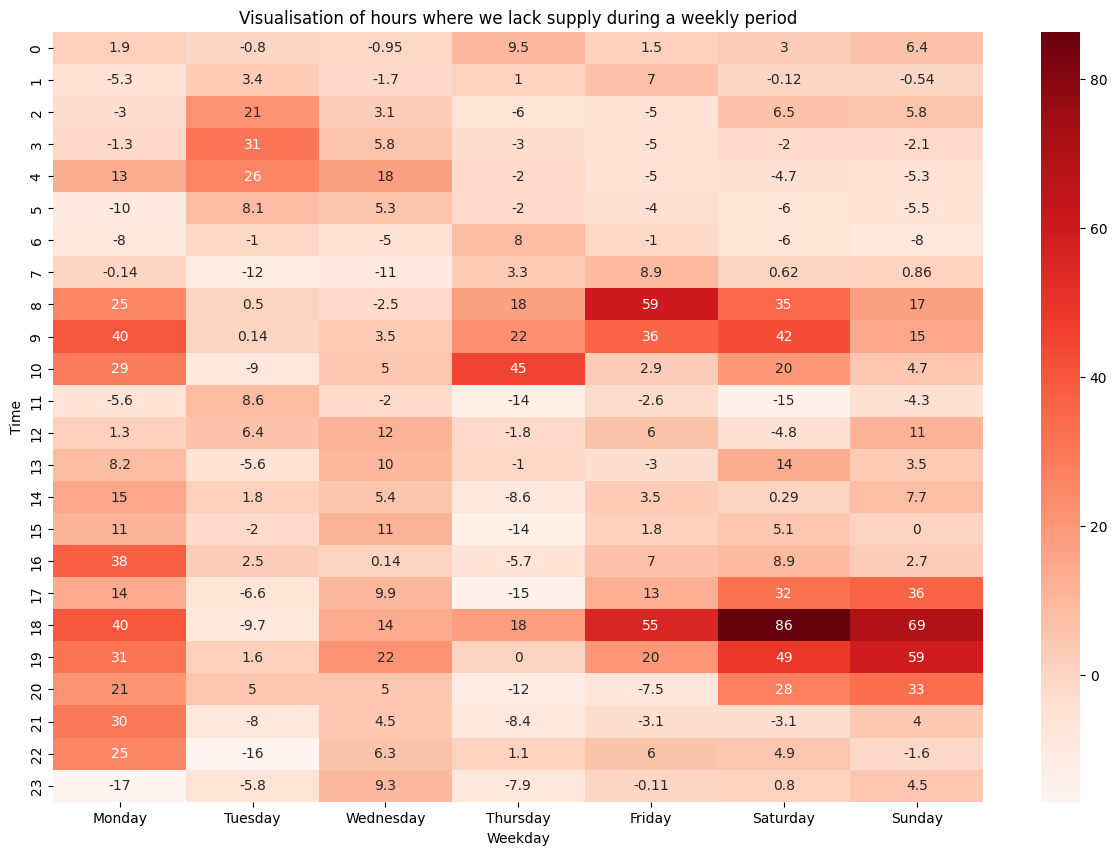

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(pivot_table, cmap='Reds', annot=True)
plt.title('Visualisation of hours where we lack supply during a weekly period')
plt.show()

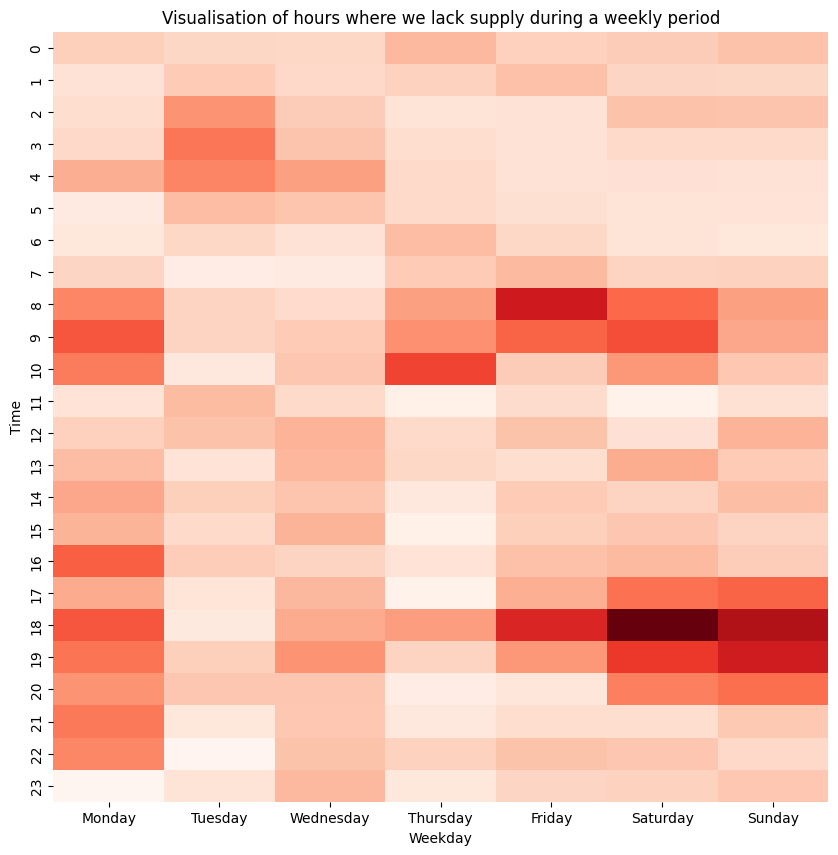

This driver-focused visualization effectively communicates insights while maintaining confidentiality through simplified presentation


In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(pivot_table, cmap='Reds', cbar=False)
plt.title('Visualisation of hours where we lack supply during a weekly period')
plt.show()

print("This driver-focused visualization effectively communicates insights while maintaining confidentiality through simplified presentation")

# Calculating levels of guaranteed hourly earnings in these 36 hours.

In [ ]:
df.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday,Demand,Supply
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,2020-03-15,23,Sunday,50.65,33
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,2020-03-15,22,Sunday,34.60,36
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0,16,97,86,2020-03-15,21,Sunday,42.69,35


In [ ]:
earning_df = df[['Date','Active drivers','Available online (hours)','Booked (hours)','Hours per active driver','Rides per hour online','Completed rides','Date.1','Time','Weekday','Demand','Supply']]
earning_df = df.assign(RPH_3hr=round(df['Rides per hour online'].rolling(window=3).mean(),2))
earning_df.head(3)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday,Demand,Supply,RPH_3hr
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,2020-03-15,23,Sunday,50.65,33,NaN
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,2020-03-15,22,Sunday,34.60,36,NaN
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0,16,97,86,2020-03-15,21,Sunday,42.69,35,1.34


In [ ]:
earning_df['guaranteed_earnings'] = earning_df['RPH_3hr'] * 8
earning_df.head(4)

,Date,Active drivers,Available online (hours),Booked (hours),Idle time (hours),Not available (hours),Hours per active driver,Rides per hour online,Completed rides,Unique users (no cabs available),Unique users (1+ cabs available),Coverage ratio,Date.1,Time,Weekday,Demand,Supply,RPH_3hr,guaranteed_earnings
0,2020-03-15 23,67,33,21,12,14,0.5,1.55,51.0,34,89,72,2020-03-15,23,Sunday,50.65,33,NaN,NaN
1,2020-03-15 22,90,36,16,20,15,0.4,1.19,43.0,2,91,98,2020-03-15,22,Sunday,34.60,36,NaN,NaN
2,2020-03-15 21,95,35,17,18,15,0.4,1.29,45.0,16,97,86,2020-03-15,21,Sunday,42.69,35,1.34,10.72
3,2020-03-15 20,78,33,24,9,16,0.4,1.52,50.0,66,105,61,2020-03-15,20,Sunday,82.08,33,1.33,10.64


In [ ]:
earning_df = earning_df.groupby(['Weekday','Time']).aggregate({'guaranteed_earnings':'median','Demand':'median','Supply':'median', 'RPH_3hr':'median'})
earning_df = earning_df.reset_index()
earning_df['Weekday_Time'] = earning_df['Weekday']+'_'+earning_df['Time'].astype(str)
earning_df = earning_df[['Weekday_Time','guaranteed_earnings']]
earning_df.head(3)

,Weekday_Time,guaranteed_earnings
0,Friday_0,3.76
1,Friday_1,1.76
2,Friday_2,1.52


In [ ]:
undersupply_df.head(36)

,Weekday_Time,undersupply,Supply_Demand_Ratio
58,Saturday_18,86.400,0.240
82,Sunday_18,69.215,0.315
22,Friday_8,59.470,0.180
83,Sunday_19,58.925,0.390
10,Friday_18,55.400,0.310
59,Saturday_19,48.790,0.380
98,Thursday_10,45.430,0.330
71,Saturday_9,42.390,0.340
47,Monday_9,40.030,0.350
34,Monday_18,39.950,0.450


In [ ]:
final_df = undersupply_df.merge(earning_df, on='Weekday_Time')
final_df = final_df.sort_values(by='undersupply',ascending=False)[:36]
final_df

,Weekday_Time,undersupply,Supply_Demand_Ratio,guaranteed_earnings
0,Saturday_18,86.400,0.240,9.20
1,Sunday_18,69.215,0.315,10.60
2,Friday_8,59.470,0.180,8.48
3,Sunday_19,58.925,0.390,10.48
4,Friday_18,55.400,0.310,8.16
5,Saturday_19,48.790,0.380,9.68
6,Thursday_10,45.430,0.330,3.20
7,Saturday_9,42.390,0.340,6.32
8,Monday_9,40.030,0.350,7.60
9,Monday_18,39.950,0.450,9.84


In [ ]:
round(final_df['guaranteed_earnings'].mean(),2)

8.22

This shows that even after offering guaranteed income to drivers, we are still maintaining the average of 8 Euros that goes to the driver.

This is very important, as we are able to increase the supply (assuming more drivers will now take the offer and be available for more time in those peak hours) at the same cost on average.

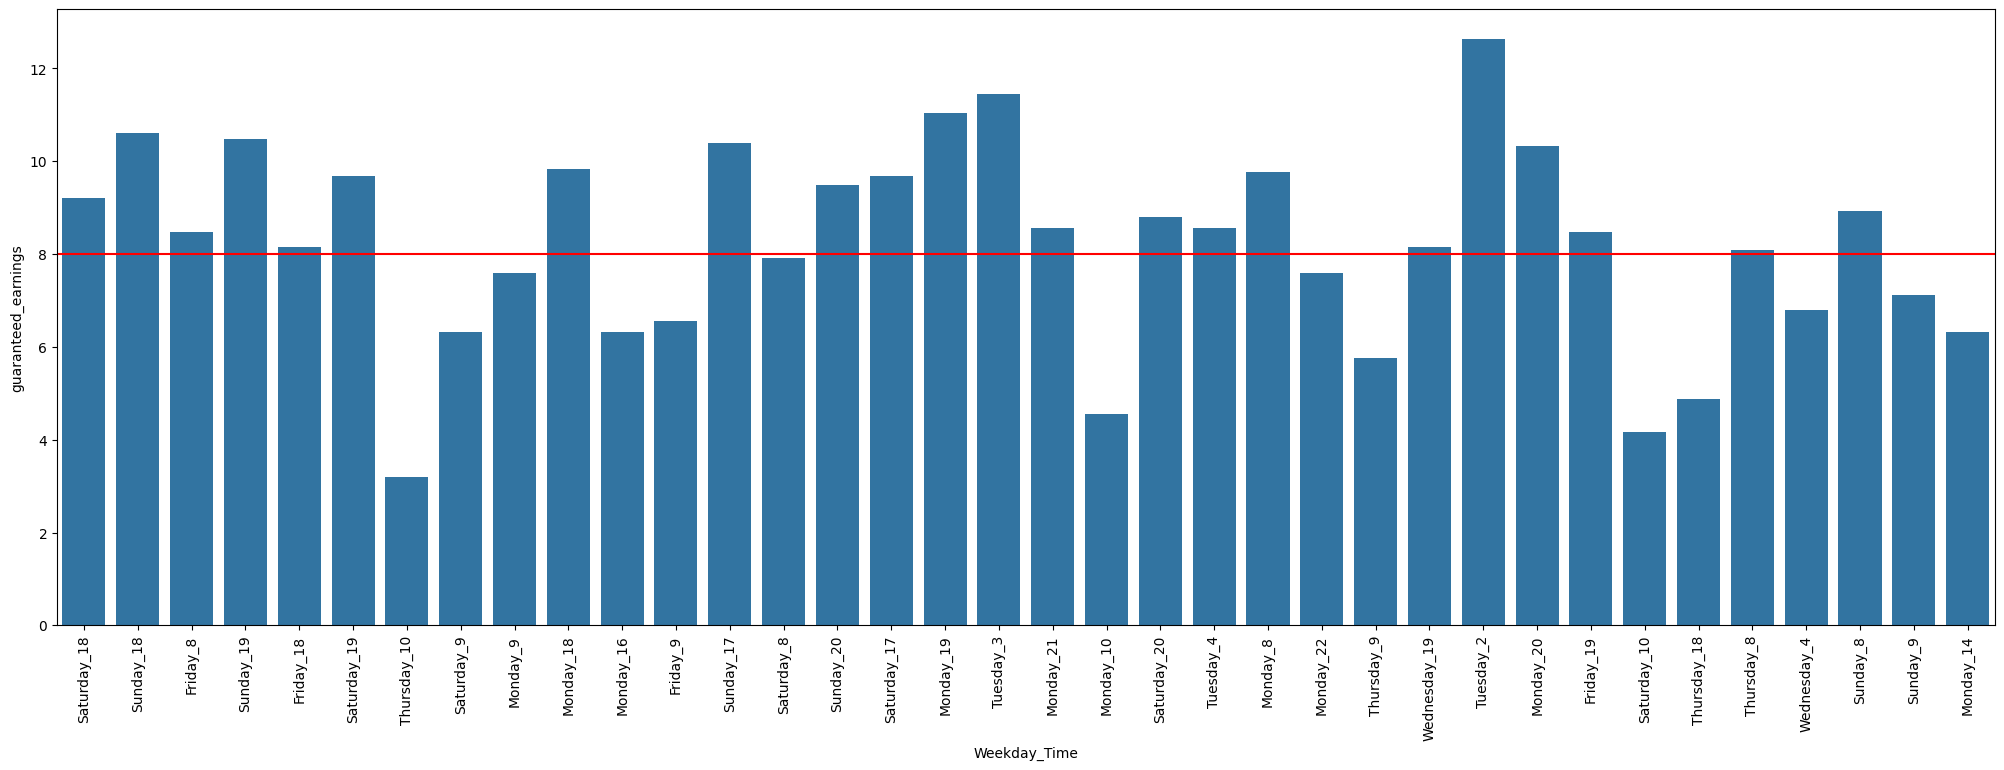

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='Weekday_Time', y='guaranteed_earnings', data=final_df)
plt.xticks(rotation=90)
plt.axhline(8.2, color='red')
plt.show()

# Utilisation Rate(Booked/Available) vs Coverage

In [ ]:
utilisation_df = df[['Weekday','Time','Demand','Supply','Booked (hours)','Available online (hours)','Coverage ratio']]
utilisation_df.head(3)

,Weekday,Time,Demand,Supply,Booked (hours),Available online (hours),Coverage ratio
0,Sunday,23,50.65,33,21,33,72
1,Sunday,22,34.60,36,16,36,98
2,Sunday,21,42.69,35,17,35,86


In [ ]:
utilisation_df = utilisation_df.assign(utilisation_ratio=100*round((utilisation_df['Booked (hours)'] /utilisation_df['Available online (hours)']),2))
utilisation_df['Weekday_Time'] = utilisation_df['Weekday']+'_'+utilisation_df['Time'].astype(str)
utilisation_df = utilisation_df[['Weekday_Time','Demand','Supply','Coverage ratio', 'utilisation_ratio']]
utilisation_df.head(3)

,Weekday_Time,Demand,Supply,Coverage ratio,utilisation_ratio
0,Sunday_23,50.65,33,72,64.0
1,Sunday_22,34.60,36,98,44.0
2,Sunday_21,42.69,35,86,49.0


In [ ]:
utilisation_df = utilisation_df.groupby('Weekday_Time').aggregate({'Demand':'median','Supply':'median','Coverage ratio':'median','utilisation_ratio':'median'}).reset_index()
utilisation_df.head(3)

,Weekday_Time,Demand,Supply,Coverage ratio,utilisation_ratio
0,Friday_0,17.50,16.0,60.0,31.0
1,Friday_1,17.00,10.0,59.0,10.0
2,Friday_10,28.92,26.0,70.0,31.0


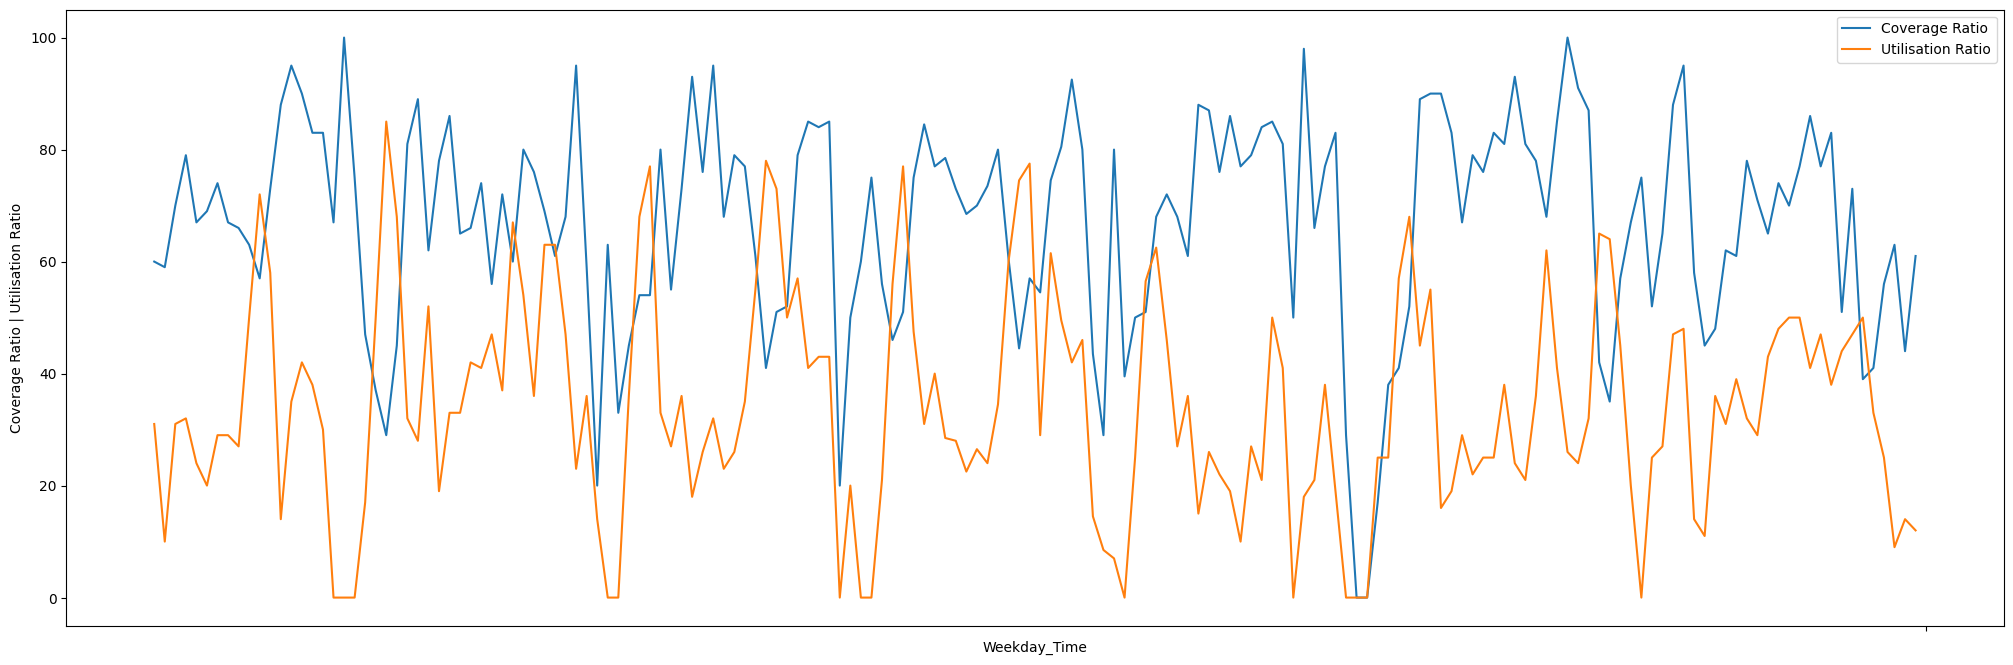

In [ ]:
plt.figure(figsize=(25,8))
sns.lineplot(x = utilisation_df['Weekday_Time'], y = utilisation_df['Coverage ratio'], label = 'Coverage Ratio')
sns.lineplot(x = utilisation_df['Weekday_Time'], y = utilisation_df['utilisation_ratio'], label = 'Utilisation Ratio')
plt.xticks('',rotation=90)
plt.ylabel('Coverage Ratio | Utilisation Ratio')
plt.legend()
plt.show()

Here, we notice a gap between utilisation and coverage. This shows that instead of foucssing only on increasing the number of drivers to meet the demand, we should first focus on reducing this gap.

#Insights And Recommendations

<font size='5'>**Insights**:

---

1.   From the hourly demand-supply curve, we observe that there is an over-supply from 2:30 AM to 7 AM, 10:30 AM to 11:30 AM and then from 9 PM to 11 PM. The peak hours are 8 AM to 10 AM and 5 PM to 8 PM.

2.   From the weekly demand-supply curve, we observe that:

    *    Monday - On most mondays from 8 AM to 10 PM, the supply is far short of demand.

    *   Tuesday - On most tuesdays, the demand is met. However, from midnight to 6 AM there is very high demand which is not met.

    *   Wednesday - Like tuesday, there is high demand from midnight till 6 AM which is not met. However, we also have an oversupply from 8 PM till midnight.

    *   Thursday - High demand from 8 AM to 10 AM and 6 PM to 7 PM. And, an oversupply everywhere else.

    *   Friday - High demand from 8 AM to 10 AM (just like thursday), but there is a shifht in the evening peak hours. They are between 5 PM to 7 PM.

    *   Saturday - Surpringly, saturday also follows the same morning peak hours from 8 AM to 10 AM. However, the undersupply in the evening is from 3 PM to 8 PM.

    *   Sunday - There is an undersupply almost at all the hours of the day.

     The weekly trend uncovers a few significant insights:
    *   Sunday and Monday are the most under-supplied day of the week.
    *   We have some over-supply on Wednesday and Thursday after 8 PM.
    *   There is a shift in the evening peak hours indicating a possibility that people leave their workplaces early.
    
3.  The top 5 most undersupplied hours are : Saturday 6 PM, Sunday 6 PM, Friday 8 AM, Sunday 7 PM and Friday 6 PM.

4.  The chart for `Levels of guaranteed hourly earnings` shows that even after offering guaranteed income to drivers, we are still maintaining the average of 8 Euros that goes to the driver.

5.  The chart for `Coverage Ratio | Utilisation Ratio for each Weekday_Time` shows the need of increasing the utilisation ratio to meet the demand rather than focusiing on increasing the supply.

---
<font size='5'>**Recommendations**:
1.   To improve the utilisation ratio, we need to move drivers from the periods of `Over-Supply` to the periods of `Under-Supply`.
2.   During the peak hours, we may charge the customers `surge-pricing` which will help us ensure the `levels of guaranteed income` to the drivers.